# Imports

In [1]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings(action="ignore")
# default figure size in this notebook
plt.rcParams['figure.figsize'] = (10,10)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load a dataset into a Pandas DataFrame

In [2]:
train_proteins = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv")
train_peptides = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv")
train_clinical = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv")
train_supplemental_clinical = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv')
train_clinical = train_clinical.append(train_supplemental_clinical, ignore_index=True)

The **train_peptides** data is composed of ***6* columns** and ***981834* entries**. We can see all 6 dimensions of our dataset by printing out the first 5 entries using the following code:

In [ ]:
# Display the first 5 examples
train_peptides.head(5)

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


# train_clinical NAN

In [3]:
from sklearn.impute import KNNImputer

# Select the variables with missing values
cols_to_impute = train_clinical[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']]

# Impute missing values using KNN imputation
imputer = KNNImputer(n_neighbors=5)
imputed_values = imputer.fit_transform(cols_to_impute)

# Replace original variables with imputed values
train_clinical[['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']] = imputed_values

# prepare protien and peptide dataframes

In [4]:
# Function to prepare dataset with all the steps mentioned above:
def prepare_dataset(train_proteins, train_peptides):
    # Step 1: Grouping 
    df_protein_grouped = train_proteins.groupby(['visit_id','UniProt'])['NPX'].mean().reset_index()
    df_peptide_grouped = train_peptides.groupby(['visit_id','Peptide'])['PeptideAbundance'].mean().reset_index()
    
    # Step 2: Pivoting
    df_protein = df_protein_grouped.pivot(index='visit_id',columns = 'UniProt', values = 'NPX').rename_axis(columns=None).reset_index()
    df_peptide = df_peptide_grouped.pivot(index='visit_id',columns = 'Peptide', values = 'PeptideAbundance').rename_axis(columns=None).reset_index()
    
    # Step 3: Merging
    pro_pep_df = df_protein.merge(df_peptide, on = ['visit_id'], how = 'left')
    
    return pro_pep_df

pro_pep_df = prepare_dataset(train_proteins, train_peptides)

######################NAN

from sklearn.impute import KNNImputer

cols_to_impute = pro_pep_df.columns[pro_pep_df.isnull().any()].tolist()
cols_to_impute = pro_pep_df[cols_to_impute].select_dtypes(include='number').columns.tolist()

# Impute missing values using KNN imputation
imputer = KNNImputer(n_neighbors=5)
imputed_values = imputer.fit_transform(pro_pep_df[cols_to_impute])

# Replace original variables with imputed values
pro_pep_df[cols_to_impute] = imputed_values

#####################################
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

# Create an empty dictionary to store the models trained for each label.
model_dict = {}

# Create an empty dictionary to store the mse score of the models trained for each label.
mse_dict = {}

# Create an empty dictionary to store the sMAPE scores of the models trained for each label.
smape_dict = {}

FEATURES = [i for i in pro_pep_df.columns if i not in ["visit_id"]]
FEATURES.append("visit_month")

# List of target labels to loop through and train models
target = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]

# different models test

#######################################################
model updrs_1
####################################################
Training model: dummy
Model dummy trained.
Training time for model dummy: 0.05 seconds
Model dummy MSE score: 30.2573
Model dummy sMAPE score: 71.0694
####################################################
Training model: linear
Model linear trained.
Training time for model linear: 0.45 seconds
Model linear MSE score: 132.2488
Model linear sMAPE score: 109.4255
####################################################
Training model: ridge
Model ridge trained.
Training time for model ridge: 0.25 seconds
Model ridge MSE score: 97.9402
Model ridge sMAPE score: 104.3805
####################################################
Training model: lasso
Model lasso trained.
Training time for model lasso: 0.11 seconds
Model lasso MSE score: 30.2573
Model lasso sMAPE score: 71.0694
####################################################
Training model: elastic
Model elastic trained.
Traini

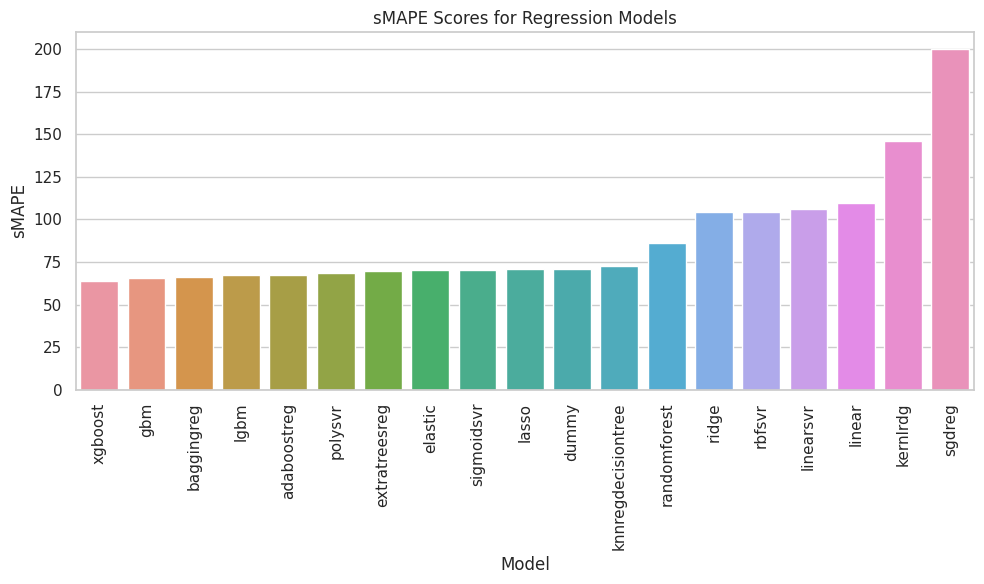

#######################################################
model updrs_2
####################################################
Training model: dummy
Model dummy trained.
Training time for model dummy: 0.04 seconds
Model dummy MSE score: 37.3192
Model dummy sMAPE score: 97.4612
####################################################
Training model: linear
Model linear trained.
Training time for model linear: 0.38 seconds
Model linear MSE score: 133.5440
Model linear sMAPE score: 129.2547
####################################################
Training model: ridge
Model ridge trained.
Training time for model ridge: 0.17 seconds
Model ridge MSE score: 103.1282
Model ridge sMAPE score: 123.0132
####################################################
Training model: lasso
Model lasso trained.
Training time for model lasso: 0.12 seconds
Model lasso MSE score: 36.4953
Model lasso sMAPE score: 97.1241
####################################################
Training model: elastic
Model elastic trained.
Train

KeyboardInterrupt: 

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
import lightgbm as lgb
import xgboost as xgb
import time
# Loop through each label   
for label in target:
    print('#######################################################')
    print(f'model {label}')
    # Merge the label 'visit_id', 'patient_id', 'visit_month' and label columns from `train_clinical` 
    # data frame to `pro_prep_df` data frame on the `visit_id` column.
    dataset_df = pro_pep_df.merge(train_clinical[['visit_id', 'patient_id', 'visit_month', label]], on = ['visit_id'], how = 'left')

    # Drop null value label rows
    dataset_df = dataset_df.dropna(subset=[label])
    
    # Make a new copy of the FEATURES list we created previously. Add `label` to it.
    feature_list = FEATURES.copy() 
    feature_list.append(label)
    
    # Split the dataset into train and validation datasets.
    train_df, valid_df = split_dataset(dataset_df[feature_list])
    # Define the pipeline with default hyperparameter values

    random_state = 42
    # default params
    classifiers = [
        # models
        DummyRegressor(strategy="mean"),
        LinearRegression(),
        Ridge(random_state=random_state),
        Lasso(random_state=random_state),
        ElasticNet(random_state=random_state),
        KernelRidge(),
        SGDRegressor(random_state=random_state),

        LinearSVR(random_state=random_state),
        SVR(kernel="linear", gamma="scale"),
        SVR(kernel="rbf", gamma="scale"),
        SVR(kernel="poly", degree=2, gamma="scale"),
        SVR(kernel="sigmoid", gamma="scale"),

        DecisionTreeRegressor(random_state=random_state),
        RandomForestRegressor(random_state=random_state),

        BaggingRegressor(random_state=random_state),
        AdaBoostRegressor(random_state=random_state),
        ExtraTreesRegressor(random_state=random_state),
        GradientBoostingRegressor(random_state=random_state),
        lgb.LGBMRegressor(random_state=random_state),
        xgb.XGBRegressor(objective="reg:squarederror", random_state=random_state)
        ]

    clf_names = [
        "dummy",
        "linear",
        "ridge",
        "lasso",
        "elastic",
        "kernlrdg",
        "sgdreg",
        "linearsvr",
        "rbfsvr",
        "polysvr",
        "sigmoidsvr", 
        "knnreg"
        "decisiontree",
        "randomforest",
        "baggingreg",
        "adaboostreg",
        "extratreesreg", 
        "gbm", 
        "lgbm", 
        "xgboost"
    ]

    ## testing

    mse_dict = {}
    smape_dict = {}
    pipelines = []
    for clf, name in zip(classifiers, clf_names):
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', clf)
        ])
        pipelines.append((name, pipeline))
    # Iterate through each model in the pipeline
    for model_name, pipeline in pipelines:
        print(f'####################################################')
        print(f"Training model: {model_name}")

        # Start the timer
        start_time = time.time()

        # Fit the model on the training data
        pipeline.fit(train_df[FEATURES], train_df[label])
        print(f"Model {model_name} trained.")

        # Calculate the elapsed time
        elapsed_time = time.time() - start_time
        print(f"Training time for model {model_name}: {elapsed_time:.2f} seconds")

        # Make predictions on the validation data
        preds = pipeline.predict(valid_df[FEATURES])

        # Calculate the MSE score
        mse = mean_squared_error(valid_df[label], preds)
        print(f"Model {model_name} MSE score: {mse:.4f}")

        # Calculate the sMAPE score
        smape_score = smape(valid_df[label], preds)
        print(f"Model {model_name} sMAPE score: {smape_score:.4f}")

        # Store the MSE and sMAPE scores in their respective dictionaries
        mse_dict[model_name] = mse
        smape_dict[model_name] = smape_score


    # Store the results in a list of lists
    results = []
    for model_name, mse_score in mse_dict.items():
        results.append([model_name, f"{mse_score:.2f}", f"{smape_dict[model_name]:.2f}"])

    # Define the headers for the table
    headers = ["Model", "MSE", "sMAPE"]

    # Print the table
    results_df = pd.DataFrame(results, columns=headers)

    # Print the DataFrame
    print(results_df)

    # plot smape scores to compare
    smape_df = pd.DataFrame.from_dict(smape_dict, orient='index', columns=['sMAPE'])
    smape_df = smape_df.sort_values(by='sMAPE')

    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=smape_df.index, y="sMAPE", data=smape_df)
    plt.xlabel('Model')
    plt.ylabel('sMAPE')
    plt.title('sMAPE Scores for Regression Models')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


# train best model each 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
import lightgbm as lgb
import xgboost as xgb
import time

classifiers = [
        # models
        lgb.LGBMRegressor(random_state=random_state),
        GradientBoostingRegressor(random_state=random_state),
        RandomForestRegressor(random_state=random_state),
        xgb.XGBRegressor(objective="reg:squarederror", random_state=random_state)      
        ]

mse_dict = {}
smape_dict = {}
pipelines = []
for clf, name in zip(classifiers, target):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', clf)
    ])
    pipelines.append((name, pipeline))

# Iterate through each model in the pipeline
for label, pipeline in pipelines:
    print('#######################################################')
    print(f'model {label}')
    # Merge the label 'visit_id', 'patient_id', 'visit_month' and label columns from `train_clinical` 
    # data frame to `pro_prep_df` data frame on the `visit_id` column.
    dataset_df = pro_pep_df.merge(train_clinical[['visit_id', 'patient_id', 'visit_month', label]], on = ['visit_id'], how = 'left')

    # Drop null value label rows
    dataset_df = dataset_df.dropna(subset=[label])

    # Make a new copy of the FEATURES list we created previously. Add `label` to it.
    feature_list = FEATURES.copy() 
    feature_list.append(label)

    # Split the dataset into train and validation datasets.
    train_df, valid_df = split_dataset(dataset_df[feature_list])
    # Define the pipeline with default hyperparameter values

    random_state = 42
    # default params

    # Start the timer
    start_time = time.time()

    # Fit the model on the training data
    pipeline.fit(train_df[FEATURES], train_df[label])
    print(f"Model {label} trained.")

    # Calculate the elapsed time
    elapsed_time = time.time() - start_time
    print(f"Training time for model {label}: {elapsed_time:.2f} seconds")

    # Make predictions on the validation data
    preds = pipeline.predict(valid_df[FEATURES])

    # Calculate the MSE score
    mse = mean_squared_error(valid_df[label], preds)
    print(f"Model {label} MSE score: {mse:.4f}")

    # Calculate the sMAPE score
    smape_score = smape(valid_df[label], preds)
    print(f"Model {label} sMAPE score: {smape_score:.4f}")

    # Store the MSE and sMAPE scores in their respective dictionaries
    mse_dict[label] = mse
    smape_dict[label] = smape_score

    # Store the model
    model_dict[label] = clf   
#####################################
for name, value in mse_dict.items():
  print(f"label {name}: mse {value:.4f}")

print("\nAverage mse", sum(mse_dict.values())/4)
print('############################')
for name, value in smape_dict.items():
  print(f"label {name}: sMAPE {value:.4f}")

print("\nAverage sMAPE", sum(smape_dict.values())/4)

# submission

In [ ]:
import amp_pd_peptide_310
env = amp_pd_peptide_310.make_env()   # initialize the environment
iter_test = env.iter_test()  
def get_predictions(test_df, model_dict):
    # Target labels
    target = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
    temp = test_df[FEATURES].copy()
    
    # Filter out all the 0 value columns before predicting
    mask = test_df[FEATURES].sum(axis=1) != 0
    new_test_df = temp.loc[mask]
    
    for u in target:
        test_df['result_' + str(u)] = 0
        if u != 'updrs_4':
            model = model_dict[u]
            X_test = new_test_df[FEATURES]
            test_df.loc[mask, 'result_' + str(u)] = model.predict(X_test)
    
    # Format for final submission
    result = pd.DataFrame()

    for m in [0, 6, 12, 24]:
        for u in [1, 2, 3, 4]:
            temp = test_df[["visit_id", "result_updrs_" + str(u)]].copy()
            temp["prediction_id"] = temp["visit_id"] + "_updrs_" + str(u) + "_plus_" + str(m) + "_months"
            temp["rating"] = temp["result_updrs_" + str(u)]
            temp = temp[['prediction_id', 'rating']]

            result = result.append(temp)
            
    result = result.drop_duplicates(subset=['prediction_id', 'rating'])

    return result

for (test, test_peptides, test_proteins, sample_submission) in iter_test:
    pro_pep_df = prepare_dataset(test_proteins, test_peptides)

    test_proteins = test_proteins.pivot(index=['visit_id', 'visit_month', 'patient_id'], 
              columns='UniProt', values='NPX').reset_index().rename_axis(None, axis=1).drop(columns=['visit_month', 'patient_id'])
    merged_df = test.merge(test_proteins, how='left', on='visit_id')

    test_df = test.merge(pro_pep_df, how='left', on='visit_id')
    
    # Add all the missing columns from FEATURES list and set the values as 0
    for col in FEATURES:
        if col not in test_df.columns:
            test_df[col] = 0
    test_df = test_df[['visit_id', 'patient_id'] + FEATURES]

    result = get_predictions(test_df, model_dict)
    print(result)

    env.predict(result)